#### In this tutorial i have used the imdb movie review dataset

## Preprocessing data

In [1]:
# Import the pandas package, then use the "read_csv" function to read
# the labeled training data
import pandas as pd       
train = pd.read_csv("labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [3]:
train.head(10)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


In [4]:
print (train["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [5]:
#we shall clean html tags using BeautifulSoup4
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup             

# Initialize the BeautifulSoup object on a single movie review     
example1 = BeautifulSoup(train["review"][0])  

# Print the raw review and then the output of get_text(), for 
# comparison
print (train["review"][0])
print (example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [6]:
#use reg expression tto remove nums and punctuation
import re
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      example1.get_text() )  # The text to search
print (letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [7]:
#let's tokenize
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words

In [8]:
print(words)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

In [9]:
# we shalll remove all the stop words
from nltk.corpus import stopwords # Import the stop word list
print (stopwords.words("english") )

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [10]:
# Remove stop words from "words"
words = [w for w in words if not w in stopwords.words("english")]
print (words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [11]:
#let's ceate a function to clean up the tain set
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [12]:
clean_review = review_to_words( train["review"][0] )
print (clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [12]:
#Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( train["review"][i] ) )

/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [14]:
clean_train_reviews[100]

'uk edition show rather less extravagant us version person concerned get new kitchen perhaps bedroom bathroom wonderfully grateful got us version show everything reality tv instead making improvements house occupants could afford entire house gets rebuilt know show trying show lousy welfare system exists us beg hard enough receive rather vulgar product placement takes place particularly sears also uncalled rsther turning one family deprived area potential millionaires would far better help community whole instead spending hundreds thousands dollars one home build something whole community perhaps place diy power tools borrowed returned along building materials everyone benefit want giving one person cause enormous resentment among rest local community still live run houses'

## Creating Features from a Bag of Words

In [13]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [14]:
train_data_features.shape

(25000, 5000)

In [15]:
vocab = vectorizer.get_feature_names()
print (vocab)

['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'adaptation', 'adaptations', 'adapted', 'add', 'added', 'adding', 'addition', 'adds', 'adequate', 'admire', 'admit', 'admittedly', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertising', 'advice', 'advise', 'affair', 'affect', 'affected', 'afford', 'aforementioned', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ages', 'aging', 'ago', 'ag

In [16]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

187 abandoned
125 abc
108 abilities
454 ability
1259 able
85 abraham
116 absence
83 absent
352 absolute
1485 absolutely
306 absurd
192 abuse
91 abusive
98 abysmal
297 academy
485 accent
203 accents
300 accept
130 acceptable
144 accepted
92 access
318 accident
200 accidentally
88 accompanied
124 accomplished
296 according
186 account
81 accuracy
284 accurate
123 accused
179 achieve
139 achieved
124 achievement
90 acid
971 across
1251 act
658 acted
6490 acting
3354 action
311 actions
83 activities
2389 actor
4486 actors
1219 actress
369 actresses
394 acts
793 actual
4237 actually
148 ad
302 adam
98 adams
453 adaptation
80 adaptations
154 adapted
810 add
439 added
166 adding
347 addition
337 adds
113 adequate
124 admire
621 admit
134 admittedly
101 adorable
510 adult
376 adults
100 advance
90 advanced
153 advantage
510 adventure
204 adventures
91 advertising
259 advice
90 advise
346 affair
93 affect
113 affected
104 afford
126 aforementioned
343 afraid
212 africa
255 african
187 afternoon

538 convincing
93 convincingly
121 convoluted
159 cook
971 cool
166 cooper
620 cop
90 copies
301 cops
575 copy
259 core
153 corner
258 corny
96 corporate
127 corpse
223 correct
82 correctly
133 corrupt
100 corruption
220 cost
233 costs
223 costume
418 costumes
7922 could
352 count
87 counter
136 countless
151 countries
935 country
103 countryside
1719 couple
93 couples
148 courage
2506 course
193 court
147 cousin
526 cover
212 covered
135 covers
212 cowboy
132 cox
106 crack
79 cracking
113 craft
167 crafted
122 craig
1039 crap
242 crappy
201 crash
118 craven
82 crawford
79 crazed
657 crazy
78 cream
612 create
542 created
245 creates
284 creating
129 creation
362 creative
85 creativity
92 creator
127 creators
340 creature
214 creatures
153 credibility
153 credible
530 credit
674 credits
91 creep
638 creepy
570 crew
117 cried
757 crime
139 crimes
325 criminal
174 criminals
107 cringe
152 crisis
124 critic
175 critical
173 criticism
398 critics
94 crocodile
325 cross
226 crowd
86 crucial


161 intentions
99 interaction
1033 interest
650 interested
3128 interesting
82 interests
266 international
155 internet
162 interpretation
180 interview
158 interviews
88 intimate
109 intrigue
120 intrigued
301 intriguing
84 introduce
313 introduced
99 introduces
168 introduction
91 invasion
80 invented
97 inventive
112 investigate
128 investigation
200 invisible
99 involve
1076 involved
114 involvement
224 involves
465 involving
93 iran
85 iraq
115 ireland
195 irish
94 iron
162 ironic
123 ironically
148 irony
85 irrelevant
231 irritating
535 island
98 isolated
85 israel
287 issue
418 issues
527 italian
153 italy
925 jack
232 jackie
340 jackson
172 jail
160 jake
1068 james
128 jamie
657 jane
292 japan
714 japanese
330 jason
90 jaw
87 jaws
157 jay
109 jazz
121 jealous
353 jean
300 jeff
107 jeffrey
259 jennifer
94 jenny
138 jeremy
134 jerk
380 jerry
130 jesse
171 jessica
289 jesus
128 jet
164 jewish
489 jim
274 jimmy
302 joan
2274 job
185 jobs
690 joe
81 joel
128 joey
2208 john
312 johnn

112 ridiculously
155 riding
3313 right
184 rights
312 ring
185 rings
323 rip
138 ripped
235 rise
79 rises
89 rising
162 risk
80 rita
135 ritter
161 rival
289 river
99 riveting
435 road
252 rob
92 robbery
80 robbins
951 robert
142 roberts
248 robin
93 robinson
217 robot
112 robots
155 rochester
876 rock
102 rocket
138 rocks
86 rocky
203 roger
170 rogers
3188 role
1112 roles
338 roll
83 rolled
183 rolling
107 roman
694 romance
854 romantic
117 romero
81 romp
183 ron
945 room
99 rooms
87 rooney
122 root
82 roots
244 rose
82 ross
96 roth
96 rotten
186 rough
244 round
201 routine
132 row
228 roy
87 royal
90 rubber
275 rubbish
94 ruby
203 ruin
227 ruined
84 ruins
86 rukh
188 rule
231 rules
1218 run
992 running
513 runs
110 rural
139 rush
138 rushed
208 russell
79 russia
302 russian
121 ruth
101 ruthless
224 ryan
84 sabrina
127 sacrifice
996 sad
112 sadistic
575 sadly
112 sadness
227 safe
98 safety
101 saga
2196 said
246 sake
134 sally
456 sam
125 samurai
186 san
174 sandler
98 sandra
276 san

## Training with Random forest

In [19]:
#first split the data into train and val
from sklearn.cross_validation import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(train_data_features, train["sentiment"], test_size=0.3, random_state=42)

In [20]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(17500, 5000)
(7500, 5000)
(17500,)
(7500,)


In [22]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100,verbose=1) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_X, train_Y )

Training the random forest...


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


In [23]:
print(forest.score)

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)>


In [54]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt

def plot_roc(model,X,Y):
    
    #predict the model on X
    y_true,y_pred=Y, model.predict(X)
    
    # Compute false positive rate and true positive rate and roc_area under the curve
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


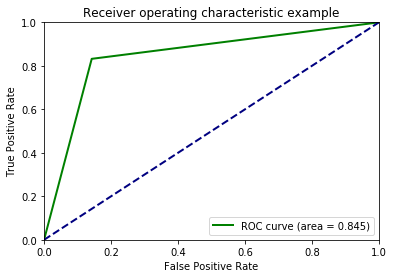

In [25]:
plot_roc(forest,test_X,test_Y)

## Training with word2vec neural net

In [1]:
import pandas as pd

In [2]:
# Read data from files 
train = pd.read_csv( "labeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3 )

test = pd.read_csv( "testData.tsv", header=0, delimiter="\t", quoting=3 )

unlabeled_train = pd.read_csv( "unlabeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3 )

In [19]:
#Verify the number of reviews that were read (100,000 in total)

print ("Read %d labeled train reviews, %d labeled test reviews, " \
 "and %d unlabeled reviews\n" % (train["review"].size,  
 test["review"].size, unlabeled_train["review"].size ))

Read 25000 labeled train reviews, 25000 labeled test reviews, and 50000 unlabeled reviews



#### processing data

In [5]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [8]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
#nltk.download()   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [9]:
sentences = []  # Initialize an empty list of sentences

print ("Parsing sentences from training set")
for review in train["review"]:
    sentences += review_to_sentences(review, tokenizer)

print ("Parsing sentences from unlabeled set")
for review in unlabeled_train["review"]:
    sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set


/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is n

Parsing sentences from unlabeled set


/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:282: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like request

In [11]:
# Check how many sentences we have in total - should be around 850,000+
print (len(sentences))
print (sentences[0])
print (sentences[1])

795538
['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again']
['maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent']


In [18]:
from numpy import array
sen=array(sentences)
sen.shape

(795538,)

### training with word2vec

In [23]:
# Import the built-in logging module and configure it so that Word2Vec 
# creates nice output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

Using TensorFlow backend.
2017-07-24 22:08:18,923 : INFO : 'pattern' package not found; tag filters are not available for English
2017-07-24 22:08:18,933 : INFO : collecting all words and their counts
2017-07-24 22:08:18,934 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-07-24 22:08:19,000 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 17776 word types
2017-07-24 22:08:19,069 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 24948 word types


Training model...


2017-07-24 22:08:19,132 : INFO : PROGRESS: at sentence #30000, processed 671315 words, keeping 30034 word types
2017-07-24 22:08:19,205 : INFO : PROGRESS: at sentence #40000, processed 897815 words, keeping 34348 word types
2017-07-24 22:08:19,270 : INFO : PROGRESS: at sentence #50000, processed 1116963 words, keeping 37761 word types
2017-07-24 22:08:19,335 : INFO : PROGRESS: at sentence #60000, processed 1338404 words, keeping 40723 word types
2017-07-24 22:08:19,401 : INFO : PROGRESS: at sentence #70000, processed 1561580 words, keeping 43333 word types
2017-07-24 22:08:19,473 : INFO : PROGRESS: at sentence #80000, processed 1780887 words, keeping 45714 word types
2017-07-24 22:08:19,540 : INFO : PROGRESS: at sentence #90000, processed 2004996 words, keeping 48135 word types
2017-07-24 22:08:19,606 : INFO : PROGRESS: at sentence #100000, processed 2226966 words, keeping 50207 word types
2017-07-24 22:08:19,674 : INFO : PROGRESS: at sentence #110000, processed 2446580 words, keeping 

2017-07-24 22:08:24,680 : INFO : PROGRESS: at sentence #750000, processed 16771230 words, keeping 120295 word types
2017-07-24 22:08:24,748 : INFO : PROGRESS: at sentence #760000, processed 16990622 words, keeping 120930 word types
2017-07-24 22:08:24,827 : INFO : PROGRESS: at sentence #770000, processed 17217759 words, keeping 121703 word types
2017-07-24 22:08:24,903 : INFO : PROGRESS: at sentence #780000, processed 17447905 words, keeping 122402 word types
2017-07-24 22:08:24,974 : INFO : PROGRESS: at sentence #790000, processed 17674981 words, keeping 123066 word types
2017-07-24 22:08:25,014 : INFO : collected 123504 word types from a corpus of 17798082 raw words and 795538 sentences
2017-07-24 22:08:25,015 : INFO : Loading a fresh vocabulary
2017-07-24 22:08:25,136 : INFO : min_count=40 retains 16490 unique words (13% of original 123504, drops 107014)
2017-07-24 22:08:25,137 : INFO : min_count=40 leaves 17238940 word corpus (96% of original 17798082, drops 559142)
2017-07-24 22:0

2017-07-24 22:09:32,571 : INFO : PROGRESS: at 45.87% examples, 438098 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:33,572 : INFO : PROGRESS: at 46.40% examples, 436475 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:34,577 : INFO : PROGRESS: at 47.12% examples, 436732 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:35,581 : INFO : PROGRESS: at 47.77% examples, 436398 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:36,590 : INFO : PROGRESS: at 48.46% examples, 436437 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:37,605 : INFO : PROGRESS: at 49.17% examples, 436537 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:38,617 : INFO : PROGRESS: at 49.89% examples, 436856 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:39,635 : INFO : PROGRESS: at 50.45% examples, 435679 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:40,640 : INFO : PROGRESS: at 51.03% examples, 434790 words/s, in_qsize 7, out_qsize 0
2017-07-24 22:09:41,641 : INFO : PROGRESS: at 51.73% examples, 434985 wor

2017-07-24 22:10:52,947 : INFO : worker thread finished; awaiting finish of 3 more threads
2017-07-24 22:10:52,955 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-07-24 22:10:52,964 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-07-24 22:10:52,972 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-07-24 22:10:52,973 : INFO : training on 88990410 raw words (63745954 effective words) took 147.1s, 433321 effective words/s
2017-07-24 22:10:52,974 : INFO : precomputing L2-norms of word weight vectors
2017-07-24 22:10:53,182 : INFO : saving Word2Vec object under 300features_40minwords_10context, separately None
2017-07-24 22:10:53,183 : INFO : not storing attribute syn0norm
2017-07-24 22:10:53,184 : INFO : not storing attribute cum_table
2017-07-24 22:10:53,752 : INFO : saved 300features_40minwords_10context


In [35]:
model.doesnt_match("france england germany south africa".split())

'south'

In [37]:
model.most_similar("mumbai")

[('argentina', 0.628261923789978),
 ('massachusetts', 0.6281167268753052),
 ('oklahoma', 0.6087297201156616),
 ('budapest', 0.6001631021499634),
 ('baltimore', 0.5930029153823853),
 ('metro', 0.5884315371513367),
 ('ny', 0.5872094631195068),
 ('louisiana', 0.5800989866256714),
 ('wisconsin', 0.5761513710021973),
 ('coastal', 0.5731668472290039)]

In [39]:
# Load the model that we created in Part 2
from gensim.models import Word2Vec
model = Word2Vec.load("300features_40minwords_10context")

2017-07-24 23:05:15,979 : INFO : loading Word2Vec object from 300features_40minwords_10context
2017-07-24 23:05:16,431 : INFO : loading wv recursively from 300features_40minwords_10context.wv.* with mmap=None
2017-07-24 23:05:16,433 : INFO : setting ignored attribute syn0norm to None
2017-07-24 23:05:16,433 : INFO : setting ignored attribute cum_table to None
2017-07-24 23:05:16,434 : INFO : loaded 300features_40minwords_10context


In [43]:
model.wv.syn0.shape

(16490, 300)

In [44]:
model["flower"]

array([  1.85920820e-02,  -2.51640733e-02,   2.60204822e-02,
        -1.53911650e-01,  -7.46476352e-02,  -9.11477488e-03,
         1.28479088e-02,   4.25412729e-02,  -1.24458075e-02,
        -2.04012766e-02,  -5.97390309e-02,   2.01310124e-03,
         2.39554513e-02,   4.24178056e-02,  -5.14717363e-02,
         4.25294340e-02,  -5.03117554e-02,   4.35140058e-02,
        -6.67699873e-02,   6.56877458e-02,   3.38563882e-02,
         9.10530146e-03,  -1.14166336e-02,   2.72658058e-02,
        -5.79985306e-02,  -4.74839695e-02,  -8.05865303e-02,
        -4.71421368e-02,   1.46171460e-02,  -3.91109921e-02,
         3.55059467e-02,  -5.60534969e-02,   1.85574070e-02,
        -7.10913613e-02,   1.16160577e-02,  -7.61321560e-02,
         5.92312813e-02,   2.94861905e-02,  -1.08542569e-01,
         9.13800076e-02,   8.08490999e-03,   4.31958912e-03,
         1.60416048e-02,  -3.98032628e-02,  -7.06000254e-02,
        -2.17018109e-02,   4.77734618e-02,   5.33982506e-03,
         1.67275444e-02,

#### using Average Feature Vector

In [50]:
import numpy as np  # Make sure that numpy is imported

def makeFeatureVec(words, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    #
    nwords = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0.
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
       #
       # Print a status message every 1000th review
        if counter%1000. == 0.:
            print ("Review %d of %d" % (counter, len(reviews)))
       # 
       # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       #
       # Increment the counter
        counter = counter + 1.
    return reviewFeatureVecs

In [51]:
# ****************************************************************
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

clean_train_reviews = []
for review in train["review"]:
    clean_train_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )

print ("Creating average feature vecs for test reviews")
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append( review_to_wordlist( review, \
        remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, num_features )


/home/pankaj/.local/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Creating average feature vecs for test reviews
Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 1900

In [52]:
trainDataVecs.shape

(25000, 300)

In [53]:
trainDataVecs[0]

array([  6.66299835e-03,  -1.72992069e-02,   2.31060814e-02,
         1.47528900e-02,   1.12644453e-02,   3.17013860e-02,
        -4.57490282e-03,  -2.01121029e-02,  -1.70066264e-02,
        -3.27502307e-03,   2.31303405e-02,   4.23544989e-04,
         2.06242222e-03,   7.87413307e-03,   1.16272550e-02,
         2.48396024e-02,   1.60723105e-02,  -4.70538763e-03,
         5.39609510e-03,  -7.21613877e-03,  -1.34641360e-02,
         7.02557561e-04,   3.93663812e-03,  -9.56555828e-03,
         1.69499144e-02,   9.60899517e-03,  -9.86651331e-03,
         1.52477401e-03,  -6.23987010e-03,   1.33480011e-02,
        -2.89903535e-03,   5.08906087e-03,  -1.12998663e-02,
         4.10991302e-03,  -8.62007588e-03,  -1.05948504e-02,
        -4.02163807e-03,  -8.59533553e-04,  -3.44930869e-03,
        -7.84368441e-03,  -5.20209689e-03,  -1.87818184e-02,
         1.91243291e-02,   2.39347126e-02,   6.76596723e-03,
        -1.45652676e-02,  -4.71138861e-03,   2.26742681e-03,
        -7.13960640e-03,

### train it using random forest

In [55]:
#first split the data into train and val
from sklearn.cross_validation import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(trainDataVecs, train["sentiment"], test_size=0.3, random_state=42)

/home/pankaj/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
# Fit a random forest to the training data, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100 ,verbose=1)

print ("Fitting a random forest to labeled training data...")
forest = forest.fit( train_X,train_Y )

print(forest.score)

Fitting a random forest to labeled training data...
<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)>


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   40.8s finished


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


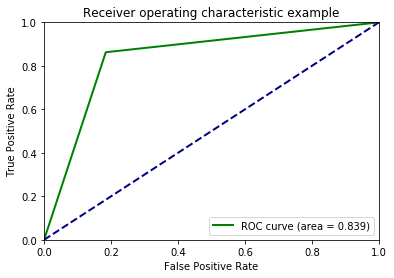

In [58]:
##plot ROC curve
plot_roc(forest,test_X,test_Y)

#### using bag of centroids method by K-means clusturing

In [71]:
from sklearn.cluster import KMeans
import time

start = time.time() # Start time

# Set "k" (num_clusters) to be 1/5th of the vocabulary size, or an
# average of 5 words per cluster
word_vectors = model.wv.syn0
num_clusters = (word_vectors.shape[0] / 5)
num_clusters=int(num_clusters)
print(num_clusters)

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters , verbose=1)
idx = kmeans_clustering.fit_predict( word_vectors.astype(np.float64) )

# Get the end time and print how long the process took
end = time.time()
elapsed = end - start
print ("Time taken for K Means clustering: ", elapsed, "seconds.")

3298
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 6130.77468583
start iteration
done sorting
end inner loop
Iteration 1, inertia 6080.863392
start iteration
done sorting
end inner loop
Iteration 2, inertia 6069.00183603
start iteration
done sorting
end inner loop
Iteration 3, inertia 6064.89764069
start iteration
done sorting
end inner loop
Iteration 4, inertia 6063.31579695
start iteration
done sorting
end inner loop
Iteration 5, inertia 6062.15903908
start iteration
done sorting
end inner loop
Iteration 6, inertia 6061.44839058
start iteration
done sorting
end inner loop
Iteration 7, inertia 6061.07352647
start iteration
done sorting
end inner loop
Iteration 8, inertia 6061.03852577
start iteration
done sorting
end inner loop
Iteration 9, inertia 6061.01598678
start iteration
done sorting
end inner loop
Iteration 10, inertia 6061.01598678
center shift 0.000000e+00 within tolerance 3.022606e-07
Initialization complete
start iteration
done so

In [87]:
# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number                                                                                            
word_centroid_map = dict(zip( model.wv.index2word, idx ))
v=list(word_centroid_map.values())
word=list(word_centroid_map.keys())

In [92]:
# For the first 10 clusters
for cluster in range(0,10):
    #
    # Print the cluster number  
    print ("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number, and print them out
    words = []
    for i in range(0,len(v)):
        if( v[i] == cluster ):
            words.append(word[i])
    print (words)


Cluster 0
['ren', 'una']

Cluster 1
['iran', 'protest', 'industrial', 'partition', 'tibet', 'ghetto', 'heartland', 'pakistan', 'eastern', 'suburbia', 'colonial', 'portugal']

Cluster 2
['charging', 'ammo', 'blasts', 'bullets', 'fire', 'rounds', 'barking', 'calmly', 'waving', 'fired', 'leaping', 'firing', 'shooting', 'fires', 'ticking']

Cluster 3
['misplaced', 'overused', 'overdone']

Cluster 4
['revelation', 'solution', 'payoff', 'logic', 'momentum', 'backstory', 'outcome', 'resolution', 'closure']

Cluster 5
['bergen']

Cluster 6
['raf', 'garrison', 'custer', 'janeway', 'sisko', 'gen', 'ceo', 'ffolkes', 'challenger', 'admiral']

Cluster 7
['report', 'imdb', 'info', 'site', 'website']

Cluster 8
['fulfill', 'share', 'embrace']

Cluster 9
['storytelling', 'presentation', 'filmmaking', 'work', 'craftsmanship']


In [95]:
def create_bag_of_centroids( wordlist, word_centroid_map ):
    #
    # The number of clusters is equal to the highest cluster index
    # in the word / centroid map
    num_centroids = max( list(word_centroid_map.values()) ) + 1
    #
    # Pre-allocate the bag of centroids vector (for speed)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" )
    #
    # Loop over the words in the review. If the word is in the vocabulary,
    # find which cluster it belongs to, and increment that cluster count 
    # by one
    for word in wordlist:
        if word in list(word_centroid_map.keys()):
            index = word_centroid_map[word]
            bag_of_centroids[index] += 1
    #
    # Return the "bag of centroids"
    return bag_of_centroids

In [96]:
# Pre-allocate an array for the training set bags of centroids (for speed)
train_centroids = np.zeros( (train["review"].size, num_clusters), \
    dtype="float32" )

# Transform the training set reviews into bags of centroids
counter = 0
for review in clean_train_reviews:
    train_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

# Repeat for test reviews 
test_centroids = np.zeros(( test["review"].size, num_clusters), \
    dtype="float32" )

counter = 0
for review in clean_test_reviews:
    test_centroids[counter] = create_bag_of_centroids( review, \
        word_centroid_map )
    counter += 1

#### Train using random forest

In [97]:
#first split the data into train and val
from sklearn.cross_validation import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(train_centroids, train["sentiment"], test_size=0.3, random_state=42)

In [100]:
# Fit a random forest and extract predictions 
forest = RandomForestClassifier(n_estimators = 100,verbose=1)

# Fitting the forest may take a few minutes
print ("Fitting a random forest to labeled training data...")
forest = forest.fit(train_X,train_Y)
#forest.score()

Fitting a random forest to labeled training data...


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.1s finished


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


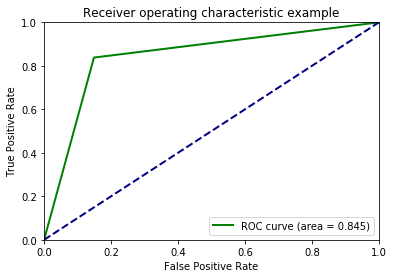

In [101]:
plot_roc(forest,test_X,test_Y)